In [1]:
from pydataset import data

import pandas as pd
import numpy as np

When the instructions say to load a dataset, you can pass the name of the dataset as a string to the data function to load the dataset. You can also view the documentation for the data set by passing the show_doc keyword argument.


In [2]:
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset

In [3]:
#1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [4]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [5]:
#1a. On average, which manufacturer has the best miles per gallon?
mpg["avg_mpg"] = (mpg.cty + mpg.hwy) / 2

mpg.groupby('manufacturer').avg_mpg.mean().nlargest(1, keep='all')

#alternate sol:
#mpg.groupby(["manufacturer"]).avg_mpg.mean().idxmax()
#idxmax looks at the series and gives you the index label because index has manufacturer labels

#alternate sol:
#mpg.groupby('manufacturer').avg_mpg.mean().sort_values(ascending=False).round(2)


manufacturer
honda    28.5
Name: avg_mpg, dtype: float64

In [6]:
#1b. How many different manufacturers are there?
mpg.manufacturer.nunique()

#or count = mpg_df.manufacturer.value_counts().count()

#displaying the variable in a human-readable format
#print('There are',count,'different maufactures in mpg.')

15

In [7]:
#1c. How many different models are there?
mpg.model.nunique()

#or count = mpg_df.model.value_counts().count()

#displaying the variable in a human-readable format
#print('There are',count,'different models in mpg.')

38

In [8]:
#1d. Do automatic or manual cars have better miles per gallon?
automatics = mpg[mpg.trans.str.contains('auto')]

manuals = mpg[mpg.trans.str.contains('manual')]

print(automatics.avg_mpg.mean())
print(manuals.avg_mpg.mean())

print('Manual cars have better average gas mileage.')

19.130573248407643
22.227272727272727
Manual cars have better average gas mileage.


In [9]:
#2. Joining and Merging
#Copy the users and roles dataframes from the examples above. 
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [10]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [11]:
#2 What do you think a right join would look like? 
right_join = pd.merge(users, roles, left_on='role_id', right_on='id', how='right')
right_join

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [12]:
#alternate right join:
right_join = pd.merge(users, 
                      roles, 
                      left_on='role_id', 
                      right_on='id', 
                      how='right',
                      indicator=True)
right_join

#indicator = True 
#default is false
#you get the merge column

#if theyre left only, we're not getting them back cause we did a right join above

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


In [13]:
#clean the data to make it make sense
clean_right = pd.merge(users, 
                    roles, 
                    left_on='role_id', 
                    right_on='id', 
                    how='right').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                                         'name_x': 'employee',
                                                                         'id_y': 'role_id',
                                                                         'name_y': 'role'}
                                                                )
clean_right

,id,employee,role_id,role
0,1.0,bob,1,admin
1,2.0,joe,2,author
2,3.0,sally,3,reviewer
3,4.0,adam,3,reviewer
4,NaN,NaN,4,commenter


In [14]:
#2 An outer join? 
#In an outer join, unmatched rows in one or both tables can be returned.

outer_join = pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')
outer_join

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [15]:
#alternate outer join:
pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer',
        indicator=True)
#indicator = True
#gives you everything since its an outer join:
#both, left only, right only

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


In [16]:
#clean the data


pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                            'name_x': 'employee',
                                                            'id_y': 'role_id',
                                                            'name_y': 'role'}
                                                    )

,id,employee,role_id,role
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,4.0,commenter


In [17]:
#2 What happens if you drop the foreign keys from the dataframes and try to merge them?
users_test = users.drop(columns='role_id')
roles_test = roles.drop(columns='id')

dropped_fks = pd.merge(users_test, roles_test)
dropped_fks
#It shows only the columns id and name, and does not include any rows.


,id,name


In [18]:
#2 dropping foreign keys correction:
users_drop = users.drop(columns='role_id')


In [19]:
# The result is not good. Now Adam is a commenter, and that is not true.

pd.merge(users_drop, roles, on='id')

,id,name_x,name_y
0,1,bob,admin
1,2,joe,author
2,3,sally,reviewer
3,4,adam,commenter


In [20]:
# Here is how they should be joined. Adam is a reviewer.

pd.merge(users, roles, left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


In [21]:
#3. Getting data from SQL databases
from env import host, user, password


In [22]:
#3a. Create a function named get_db_url. 
# It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.
def get_db_url(user, host, password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url

#or do below where user=user, host=host, password=password
#so that way you only have to specify which db you want('employees')
# like so: pd.read_sql(sql_query, get_db_url('employees'))

# def get_db_url(db, user=user, host=host, password=password):
#     return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [23]:
#3b. Use your function to obtain a connection to the employees database.
#pd.read_sql('select * from employees', get_db_url(user, host, password, 'employees'))

#or
sql = """
select *
from employees
"""

pd.read_sql(sql, get_db_url(user, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [24]:
#pd.read_csv reads data way faster:

# employees = pd.read_sql(sql_query, get_db_url('employees'))
# employees.to_csv('employees.csv')

# I had to add a file path to my file name bc of where I have my file.

#employees = pd.read_csv('data/employees.csv', index_col=0)
#employees.head()

#but this runs a problem if your database has updates

In [25]:
#3c. Once you have successfully run a query:
# Intentionally make a typo in the database url. What kind of error message do you see?
sql = """
select *
from employees
"""

pd.read_sql(sql, get_db_url(user, host, password, 'emp'))

#error message shown:
#OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'easley_1260'@'%' to database 'emp'")
#(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [26]:
# Intentionally make an error in your SQL query. What does the error message look like?
sql = """
select *
form emp
"""

pd.read_sql(sql, get_db_url(user, host, password, 'employees'))

#error message shown:
#ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'form emp' at line 2")
#[SQL: 
#select *
#form emp
#]
#(Background on this error at: http://sqlalche.me/e/13/f405)

In [27]:
#3d. Read the employees and titles tables into two separate dataframes
sql_employees = """
select * from employees
"""

employees=pd.read_sql(sql_employees, get_db_url(user, host, password, 'employees'))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [28]:
sql_titles = """
select * from titles
"""
titles=pd.read_sql(sql_titles, get_db_url(user, host, password, 'employees'))
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [29]:
#3e. Visualize the number of employees with each title.
employees.info()
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [30]:
#3e. Visualize the number of employees with each title w/ groupby.
#get the frequency for each title
titles.groupby('title').emp_no.count()

title
Assistant Engineer     15128
Engineer              115003
Manager                   24
Senior Engineer        97750
Senior Staff           92853
Staff                 107391
Technique Leader       15159
Name: emp_no, dtype: int64

In [31]:
#3e. Visualize the number of employees with each title w/ value_counts()
#value_counts pretty much does the same:

title_values = titles.title.value_counts()
title_values

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

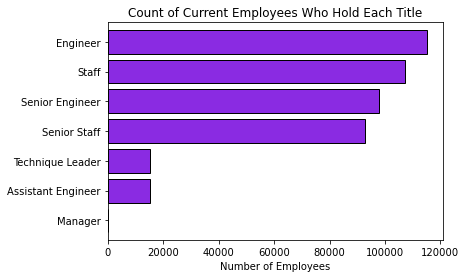

In [34]:
#3e. Visualize the number of employees with each title w/ barplot.
#get variable title_values from above and plot/customize data:

import matplotlib.pyplot as plt

title_values.plot.barh(color='blueviolet',
                ec='black',
                width=.8)

plt.title('Count of Current Employees Who Hold Each Title')
plt.xlabel('Number of Employees')

#bar h for a horizontal chart give you from lowest to highest
#reverse the order w/ plt.gca().invert_yaxis()
plt.gca().invert_yaxis()

plt.show()

In [35]:
#3f. Join the employees and titles dataframes together.

#these are the defaults:
#pd.merge(left_df, right_df, how='inner', on=None, left_on=None, right_on=None, 
#         left_index=False, right_index=False, sort=True, suffixes='_x', '_y', 
#         copy=True, indicator=False, validate=None)
        
emp_and_titles = employees.merge(titles, on='emp_no')
emp_and_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [36]:
#3g. Visualize how frequently employees change titles.
#title_changes = emp_and_titles.emp_no.value_counts()
#title_changes.value_counts()

#emp_and_titles.groupby("emp_no").title.count()
emp_and_titles.groupby(["emp_no", "title"]).title.count()


emp_no  title          
10001   Senior Engineer    1
10002   Staff              1
10003   Senior Engineer    1
10004   Engineer           1
        Senior Engineer    1
                          ..
499997  Engineer           1
        Senior Engineer    1
499998  Senior Staff       1
        Staff              1
499999  Engineer           1
Name: title, Length: 443306, dtype: int64

In [37]:
emp_and_titles.groupby("emp_no").title.count().value_counts()

1    159754
2    137256
3      3014
Name: title, dtype: int64

In [38]:
changes=emp_and_titles.emp_no.value_counts()
changes

103876    3
467421    3
204120    3
105515    3
262553    3
         ..
201714    1
254956    1
250858    1
248809    1
10245     1
Name: emp_no, Length: 300024, dtype: int64

In [39]:
#now we can do value_counts on changes to get a count of 1s, 2s, 3s.
changes.value_counts()

1    159754
2    137256
3      3014
Name: emp_no, dtype: int64

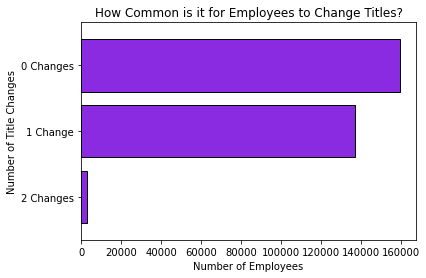

In [40]:
#plot changes.value_counts() from above:
# 0 changes == 1 title 
# 1 change  == 2 titles 
# 2 changes == 3 titles

changes.value_counts().plot(kind='barh', 
                            color='blueviolet', 
                            ec='black', 
                            width=.8)

plt.title('How Common is it for Employees to Change Titles?')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Title Changes')
plt.yticks(ticks=[0,1,2], labels=['0 Changes', '1 Change', '2 Changes'])

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [41]:
#3h. For each title, find the hire date of the employee that was hired most recently with that title.
emp_and_titles.groupby('title').hire_date.max()

#or emp_and_titles.groupby('title')['hire_date'].max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [42]:
#3i. Write the code necessary to create a cross tabulation of the number of titles by department. 
# (Hint: this will involve a combination of SQL and python/pandas code)
sql = """
select emp_no, title, dept_name 
from employees
join dept_emp using (emp_no)
join titles using (emp_no)
join departments using (dept_no);
"""

titles_by_department = pd.read_sql(sql, get_db_url(user, host, password, 'employees'))

all_titles = pd.crosstab(titles_by_department.dept_name, titles_by_department.title)

all_titles

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [43]:
#can style out and highlight max in each row

all_titles = pd.crosstab(titles_by_department.dept_name, titles_by_department.title)

all_titles

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [44]:
#4. Use your get_db_url function to help you explore the data from the chipotle database. 
# Use the data to answer the following questions
chipotle_sql = """
select *
from orders;
"""

orders = pd.read_sql(chipotle_sql, get_db_url(user, host, password, 'chipotle'))
orders.head()


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [45]:
#4a. What is the total price for each order?
#item price is a string so need to rplace $ and save as float
#.sum() to get a total

orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)

In [46]:
order_totals = orders.groupby('order_id').item_price.sum()
order_totals

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [47]:
#4b. What are the most popular 3 items?

top_three = orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)
top_three


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

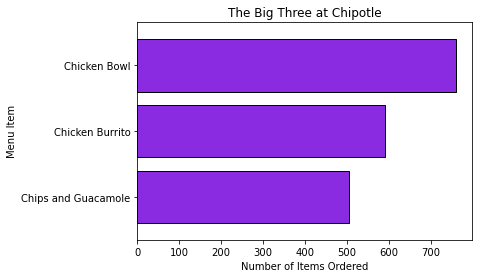

In [48]:
#4b. visualized
top_three.plot(kind='barh',
             color='blueviolet', 
             ec='black', 
             width=.8)

plt.title('The Big Three at Chipotle')
plt.xlabel('Number of Items Ordered')
plt.ylabel('Menu Item')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [49]:
#4c. Which item has produced the most revenue?
#note: item_price column is accounting for quantity already

#returns the item(s) w/ the highest revenue using .nlargest()
orders.groupby('item_name').item_price.sum().nlargest(1, keep='all')

#alternate sol getting just the item name w/ the highest revenue:
#orders.groupby('item_name').item_price.sum().idxmax()

#alternate sol by sorting values and returning the top ones using .head():
#orders.groupby('item_name').item_price.sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

Extra Pandas Exercises and Resources

https://www.w3resource.com/python-exercises/pandas/index.php

https://towardsdatascience.com/20-pandas-functions-that-will-boost-your-data-analysis-process-f5dfdb2f9e05

https://github.com/guipsamora/pandas_exercises

https://github.com/ajcr/100-pandas-puzzles


More Practice!
For even more practice with pandas, you can do the exercises from the SQL module, but instead of using SQL to do the aggregation, sorting, joining, etc, use pandas. That is, read the data from all of the tables into pandas dataframes and manipulate the dataframes.